# Gleb Pimenov 1820243077

In [88]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load Iris dataset

In [89]:
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode the target variable

In [90]:
encoder = OneHotEncoder()
y_onehot = encoder.fit_transform(y).toarray()  # Convert sparse matrix to array

# Split the dataset into training, validation, and testing sets

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Define neural network architecture

In [92]:
input_size = 4
hidden_size = 10
output_size = 3
learning_rate = 0.1

# Initialize weights

In [93]:
np.random.seed(0)
weights_input_hidden = np.random.randn(input_size, hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)

# Sigmoid activation function

In [94]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function

In [95]:
def sigmoid_derivative(x):
    return x * (1 - x)

# Define lists to store training, validation, and test accuracies

In [96]:
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Training the neural network using gradient descent

In [97]:
for epoch in range(290):
    # Forward pass - training data
    hidden_input = np.dot(X_train, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)

    output_input = np.dot(hidden_output, weights_hidden_output)
    output = sigmoid(output_input)

    # Backpropagation
    output_error = y_train - output
    output_delta = output_error * sigmoid_derivative(output)

    hidden_error = np.dot(output_delta, weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights
    weights_hidden_output += np.dot(hidden_output.T, output_delta) * learning_rate
    weights_input_hidden += np.dot(X_train.T, hidden_delta) * learning_rate

    # Forward pass - validation data
    hidden_output_val = sigmoid(np.dot(X_val, weights_input_hidden))
    output_val = sigmoid(np.dot(hidden_output_val, weights_hidden_output))

    # Calculate validation accuracy
    predicted_labels_val = np.argmax(output_val, axis=1)
    val_accuracy = np.mean(predicted_labels_val == np.argmax(y_val, axis=1))
    val_accuracies.append(val_accuracy)
    
    # Forward pass - test data
    hidden_layer_test = sigmoid(np.dot(X_test, weights_input_hidden))
    predictions_test = sigmoid(np.dot(hidden_layer_test, weights_hidden_output))

    # Convert probabilities to class labels
    predicted_labels_test = np.argmax(predictions_test, axis=1)

    # Calculate test accuracy
    test_accuracy = np.mean(predicted_labels_test == np.argmax(y_test, axis=1))
    test_accuracies.append(test_accuracy)

    if epoch % 100 == 0:
        # Calculate training accuracy
        predicted_labels_train = np.argmax(output, axis=1)
        train_accuracy = np.mean(predicted_labels_train == np.argmax(y_train, axis=1))
        train_accuracies.append(train_accuracy)
        print(f"Epoch {epoch}: Training Accuracy = {train_accuracy}, Validation Accuracy = {val_accuracy}, Test Accuracy = {test_accuracy}")

Epoch 0: Training Accuracy = 0.3191489361702128, Validation Accuracy = 0.09090909090909091, Test Accuracy = 0.4222222222222222
Epoch 100: Training Accuracy = 0.6170212765957447, Validation Accuracy = 0.36363636363636365, Test Accuracy = 0.7111111111111111
Epoch 200: Training Accuracy = 0.6808510638297872, Validation Accuracy = 0.7272727272727273, Test Accuracy = 0.7111111111111111


In [98]:
print(f"\n\tTest Accuracy = {test_accuracy}")
print(f"\tValidation Accuracy = {val_accuracy}")


	Test Accuracy = 0.8888888888888888
	Validation Accuracy = 0.9090909090909091


# Plotting validation and test accuracies

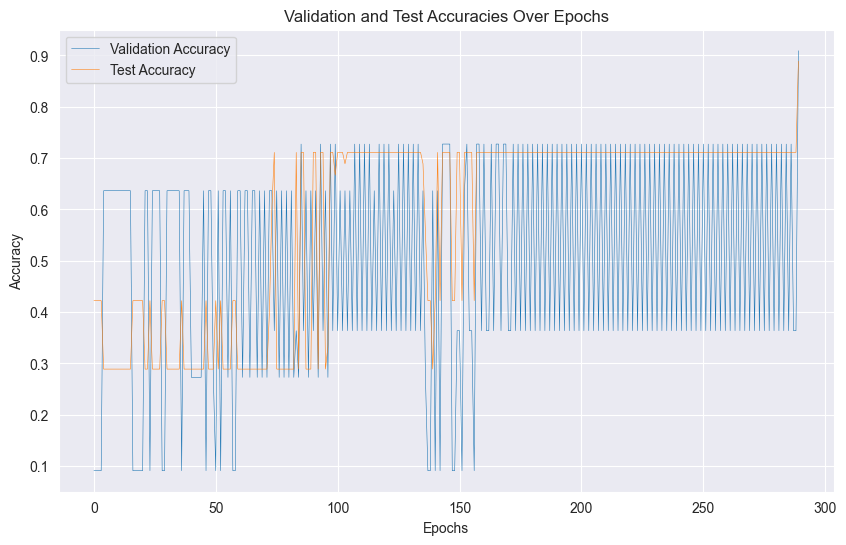

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(val_accuracies[::], label='Validation Accuracy', linewidth=0.4)
plt.plot(test_accuracies[::], label='Test Accuracy', linewidth=0.4)
plt.title('Validation and Test Accuracies Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()